<a href="https://colab.research.google.com/github/bazziamir24/On-Correlation-Detection-and-Alignment-Recovery-of-Gaussian-Databases/blob/main/On_Correlation_Detection_and_Alignment_Recovery_of_Gaussian_Databases_By_Ran_Tamir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

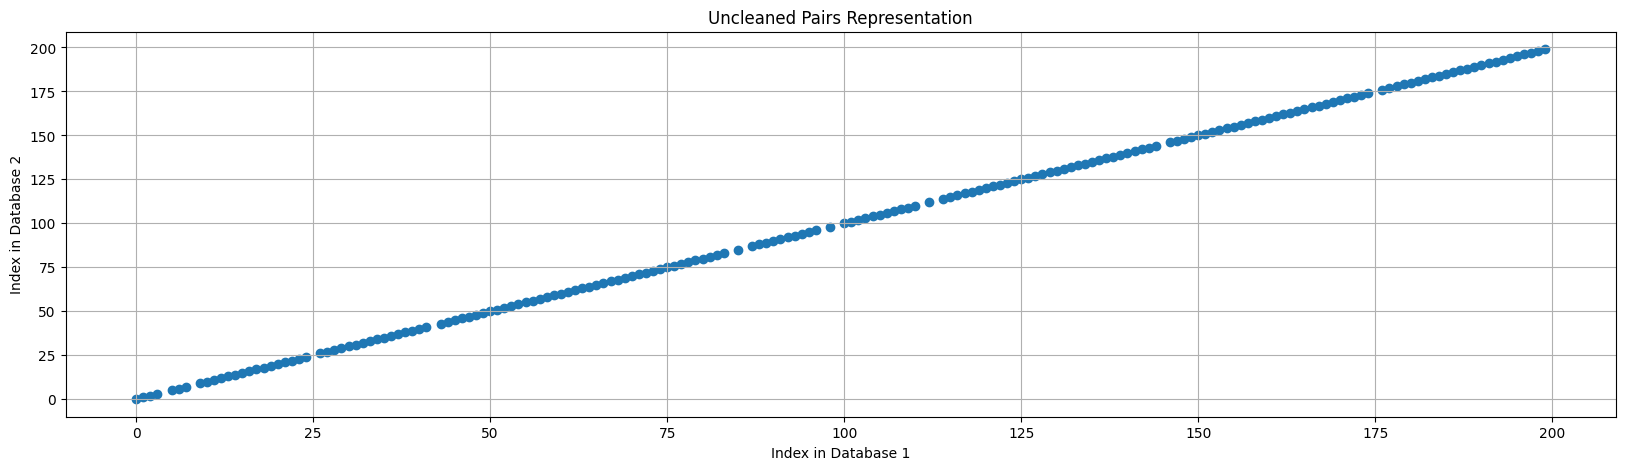

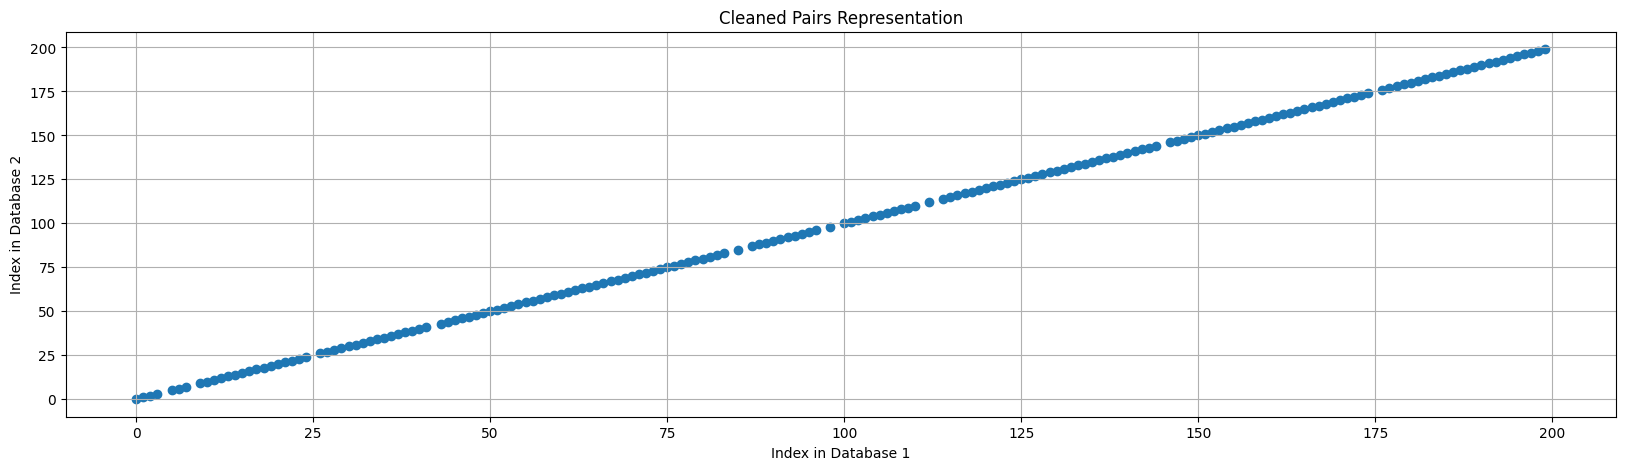

Significant pairs (before cleaning): 188
Cleaned pairs: 188
[(0, 0), (1, 1), (2, 2), (3, 3), (5, 5), (6, 6), (7, 7), (9, 9), (10, 10), (11, 11), (12, 12), (13, 13), (14, 14), (15, 15), (16, 16), (17, 17), (18, 18), (19, 19), (20, 20), (21, 21), (22, 22), (23, 23), (24, 24), (26, 26), (27, 27), (28, 28), (29, 29), (30, 30), (31, 31), (32, 32), (33, 33), (34, 34), (35, 35), (36, 36), (37, 37), (38, 38), (39, 39), (40, 40), (41, 41), (43, 43), (44, 44), (45, 45), (46, 46), (47, 47), (48, 48), (49, 49), (50, 50), (51, 51), (52, 52), (53, 53), (54, 54), (55, 55), (56, 56), (57, 57), (58, 58), (59, 59), (60, 60), (61, 61), (62, 62), (63, 63), (64, 64), (65, 65), (66, 66), (67, 67), (68, 68), (69, 69), (70, 70), (71, 71), (72, 72), (73, 73), (74, 74), (75, 75), (76, 76), (77, 77), (78, 78), (79, 79), (80, 80), (81, 81), (82, 82), (83, 83), (85, 85), (87, 87), (88, 88), (89, 89), (90, 90), (91, 91), (92, 92), (93, 93), (94, 94), (95, 95), (96, 96), (98, 98), (100, 100), (101, 101), (102, 102),

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def normalize(DB,n,d):
  Normalized_DB=np.zeros((n,d))
  for i in range(n):
    Magnitude = np.linalg.norm(DB[i])
    Normalized_DB[i]=DB[i]/Magnitude
  return Normalized_DB

def generate_bivariate_data(d, n, mean, covariance_matrix):


    X = np.zeros((n, d))
    Y = np.zeros((n, d))

    for i in range(n):
      for j in range(d):
        xy = np.random.multivariate_normal(mean, covariance_matrix, 1)

        X[i,j] = xy[0,0]
        Y[i,j] = xy[0,1]



    return X, Y


# def probability(theta,n,d):
#   proba=0
#   for _ in range(10000):
#     mean = [0, 0]  # Mean vector
#     covariance_matrix = [[1, 0.9], [0.9, 1]]  # Covariance matrix
#     db1,db2=generate_bivariate_data(d,n,mean,covariance_matrix)
#     norm_db1 =normalize(db1,n,d)
#     norm_db2 = normalize(db2,n,d)
#     inner_product_matrix = np.dot(norm_db1, norm_db2.T)
#     P = np.sum((inner_product_matrix >= theta).astype(int)) / (inner_product_matrix.shape[0] * inner_product_matrix.shape[1])
#     print("Number of corrolated Rows: ", np.sum((inner_product_matrix >= theta).astype(int)))
#     print("P: ", P)
#     proba+=P
#   #   Avg=np.mean(inner_product_matrix)
#   #   print(Avg)
#   #   if Avg>=theta:
#   #     proba+=1
#   proba=proba/10000
#   return proba


#Threshold_and_clean Algorithm

def threshold_and_clean(db1, db2, theta,beta):
    n, d = db1.shape
    norm_db1 =normalize(db1,n,d)
    norm_db2 = normalize(db2,n,d)
    inner_product_matrix = np.dot(norm_db1, norm_db2.T)
    significant_pairs = np.argwhere(inner_product_matrix > theta)
    def phi(significant_pairs, n, beta, Proba):
      N_theta = len(significant_pairs)
      t = beta * n * Proba
      return int(N_theta >= t)
    phi=phi(significant_pairs,n,beta,Proba=0.9)
    if phi==1:
      cleaned_pairs = []
      for i in range(n):
          row_pairs = significant_pairs[significant_pairs[:, 0] == i]
          if len(row_pairs) > 0:
              max_idx = row_pairs[np.argmax(inner_product_matrix[row_pairs[:, 0], row_pairs[:, 1]]), 1]
              cleaned_pairs.append((i, max_idx))


    else:
      cleaned_pairs=None
    return significant_pairs,phi, cleaned_pairs



# # Example usage with dummy data
n, d = 200, 50# 10 samples, 5 dimensions
mean=[0,0]
covariance_matrix=[[1,0.7],[0.7,1]]
DB1,DB2=generate_bivariate_data(d,n,mean,covariance_matrix)
#DB1 = np.random.normal(0, 1, (n, d))
#DB2 = np.random.normal(0, 1, (n, d))
# print(db1[1])
theta =0.6 # Example threshold
beta=0.4

significant_pairs,phi_value, cleaned_pairs = threshold_and_clean(DB1, DB2, theta,beta)



# # Plotting the significant pairs after cleaning
if phi_value==1:
  cleaned_pairs_np = np.array(cleaned_pairs)
  significant_pairs=np.array(significant_pairs)
  plt.figure(figsize=(20, 5))
  plt.scatter(significant_pairs[:, 0], significant_pairs[:, 1])
  plt.title('Uncleaned Pairs Representation')
  plt.xlabel('Index in Database 1')
  plt.ylabel('Index in Database 2')
  plt.grid(True)
  plt.show()
  plt.figure(figsize=(20, 5))
  plt.scatter(cleaned_pairs_np[:, 0], cleaned_pairs_np[:, 1])
  plt.title('Cleaned Pairs Representation')
  plt.xlabel('Index in Database 1')
  plt.ylabel('Index in Database 2')
  plt.grid(True)
  plt.show()
  print("Significant pairs (before cleaning):", len(significant_pairs))
  print("Cleaned pairs:", len(cleaned_pairs))
  print(cleaned_pairs)


# # Display results
print("Phi =", phi_value)


In [ ]:
#Type 1 and type 2 errors
def compute_type_I_error(n_simulations, n, d, theta, beta, Proba):
    type_I_errors = 0
    for _ in range(n_simulations):
        # Generate random data independently for each database under null hypothesis
          # Number of data points
        mean = [0, 0]  # Mean vector
        covariance_matrix = [[1, 0], [0, 1]]  # Covariance matrix
        db1,db2=generate_bivariate_data(d,n,mean,covariance_matrix)
        # Compute significant pairs and phi value
        _,phi_value,_ = threshold_and_clean(db1, db2, theta,beta)
        # Check if null hypothesis (phi=0) is rejected
        if phi_value == 1:
            type_I_errors += 1

    type_I_error_prob = type_I_errors / n_simulations
    return type_I_error_prob


def compute_type_II_error(n_simulations, n, d, theta, beta, Proba):
    type_II_errors = 0
    for _ in range(n_simulations):
        # Generate random data independently for each database under null hypothesis
          # Number of data points
        mean = [0, 0]  # Mean vector
        covariance_matrix = [[1, 0.7], [0.7, 1]]  # Covariance matrix
        db1,db2=generate_bivariate_data(d,n,mean,covariance_matrix)
        # Compute significant pairs and phi value
        _,phi_value,_ = threshold_and_clean(db1, db2, theta,beta)
        # Check if null hypothesis (phi=0) is rejected
        if phi_value == 0:
            type_II_errors += 1

    type_II_error_prob = type_II_errors / n_simulations
    return type_II_error_prob





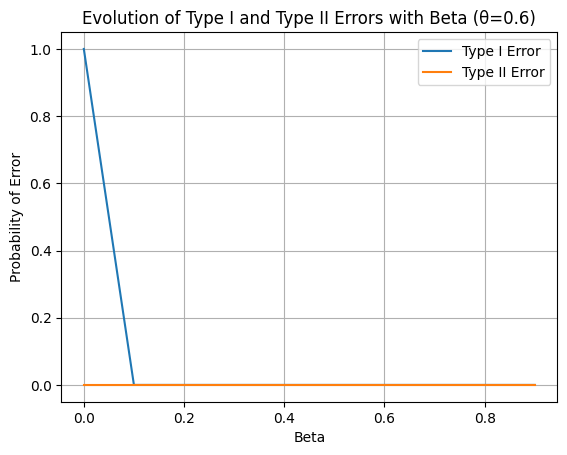

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the range of beta values
beta_values = np.arange(0, 1, 0.1)


# Calculate and plot errors for each theta value

    # Initialize lists to store probabilities of errors for this theta
type_I_errors = []
type_II_errors = []
theta=0.6

    # Calculate errors for each beta value
for beta in beta_values:
  P1 = compute_type_I_error(10, 200, 50, 0.6, beta, 0.9)  # Example function call
  P2 = compute_type_II_error(10, 200, 50, 0.6, beta, 0.9)  # Example function call
  type_I_errors.append(P1)
  type_II_errors.append(P2)

    # Plot the results for this theta in a new figure
plt.figure()
plt.plot(beta_values, type_I_errors, label='Type I Error')
plt.plot(beta_values, type_II_errors, label='Type II Error')
plt.xlabel('Beta')
plt.ylabel('Probability of Error')
plt.title(f'Evolution of Type I and Type II Errors with Beta (θ={theta:.1f})')
plt.legend()
plt.grid(True)
plt.show()


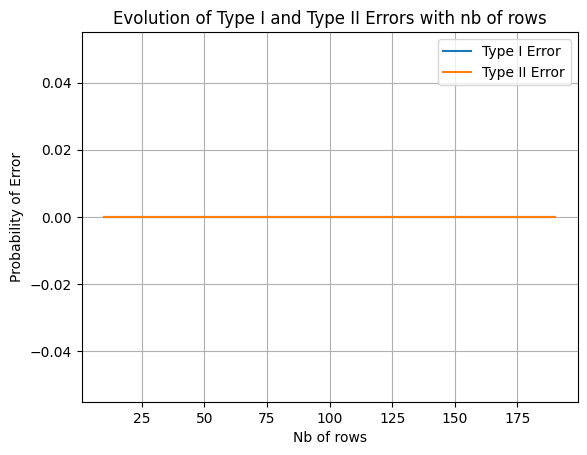

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming compute_type_I_error and compute_type_II_error functions are defined elsewhere

# Define the range of beta values
rows=np.arange(10,200,10)
type_I_errors = []
type_II_errors = []
beta=0.4
theta=0.6

# Calculate errors for each theta value
for n in rows:
  P1 = compute_type_I_error(10, n, 50, theta, beta, 0.9)  # Example function call
  P2 = compute_type_II_error(10, n, 50, theta, beta, 0.9)  # Example function call
  type_I_errors.append(P1)
  type_II_errors.append(P2)

# Plot the results for this theta

plt.plot(rows, type_I_errors, label=f'Type I Error')
plt.plot(rows, type_II_errors, label=f'Type II Error')

# Add labels and title
plt.xlabel('Nb of rows')
plt.ylabel('Probability of Error')
plt.title('Evolution of Type I and Type II Errors with nb of rows')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

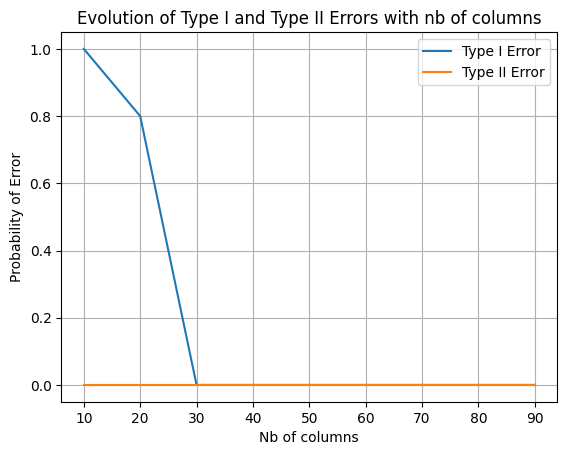

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming compute_type_I_error and compute_type_II_error functions are defined elsewhere

# Define the range of beta values
columns=np.arange(10,100,10)
type_I_errors = []
type_II_errors = []
beta=0.4
theta=0.6

# Calculate errors for each theta value
for d in columns:
  P1 = compute_type_I_error(10, 200, d, theta, beta, 0.9)  # Example function call
  P2 = compute_type_II_error(10, 200, d, theta, beta, 0.9)  # Example function call
  type_I_errors.append(P1)
  type_II_errors.append(P2)

# Plot the results for this theta

plt.plot(columns, type_I_errors, label=f'Type I Error')
plt.plot(columns, type_II_errors, label=f'Type II Error')

# Add labels and title
plt.xlabel('Nb of columns')
plt.ylabel('Probability of Error')
plt.title('Evolution of Type I and Type II Errors with nb of columns')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

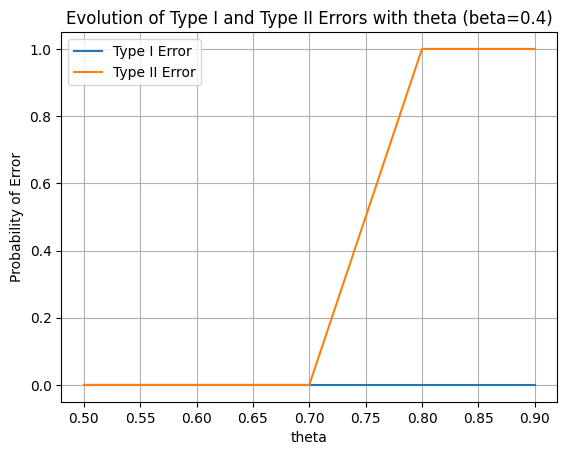

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the range of beta values

theta_values = np.arange(0.5, 1, 0.1)
beta=0.4
type_I_errors = []
type_II_errors = []
# Calculate and plot errors for each theta value

    # Calculate errors for each beta value
for theta in theta_values:
    P1 = compute_type_I_error(10, 200, 50, theta, beta, 0.9)  # Example function call
    P2 = compute_type_II_error(10, 200, 50, theta, beta, 0.9)  # Example function call
    type_I_errors.append(P1)
    type_II_errors.append(P2)

# Plot the results for this theta in a new figure
plt.figure()
plt.plot(theta_values, type_I_errors, label='Type I Error')
plt.plot(theta_values, type_II_errors, label='Type II Error')
plt.xlabel('theta')
plt.ylabel('Probability of Error')
plt.title(f'Evolution of Type I and Type II Errors with theta (beta={beta:.1f})')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
from scipy.special import betainc, beta

def Q(d, theta):
    phi = np.arccos(theta)  # half-angle
    term1 = (np.sin(phi)**(d-1)) / 2
    term2 = betainc((d-1)/2, 0.5, theta**2)
    term3 = beta((d-1)/2, 0.5)
    return term1 * term2 / term3

# Example usage:
d = 50 # dimension
theta = 0.6 # example theta value
probability = Q(d, theta)
print(probability)

4.6821970582323073e-17


In [ ]:
def simulate_correlation(d, rho, theta, n_simulations=100):
    detect_count = 0


    for _ in range(n_simulations):
        # Simulate two correlated Gaussian vectors
        covariance_matrix = [[1, rho], [rho, 1]]
        mean=[0,0] # Covariance matrix
        X,Y=generate_bivariate_data(d,1,mean,covariance_matrix)
        X =normalize(X,1,d)
        Y= normalize(Y,1,d)


        # Compute the normalized inner product
        normalized_inner_product = np.dot(X, Y.T)

        # Increment detect count if the normalized inner product exceeds theta
        if normalized_inner_product >= theta:
            detect_count += 1

    # Estimate the probabilities
    P_d_rho_theta = detect_count / n_simulations

    return P_d_rho_theta
# Example usage
n=200
d =50 # Dimension of the feature vectors
rho = 0.7 # Correlation coefficient
theta = 0.6  # Threshold for detection
n_simulations = 1000 # Number of simulations for estimation

P_d_rho_theta= simulate_correlation(d, rho, theta, n_simulations)
P_d_rho_theta


0.911

In [ ]:
import numpy as np
from scipy.special import factorial,comb
from scipy.optimize import minimize_scalar

# Define the Stirling numbers of the second kind and B(k) function
def stirling_second_kind(k, l):
    # Note: We use math.factorial instead of np.math.factorial due to deprecation
    sum_terms = sum((-1)**i * comb(l, i, exact=True) * (l - i)**k for i in range(l))
    return sum_terms / factorial(l)

def B(k):
    # Note: We use math.factorial instead of np.math.factorial due to deprecation
    return sum(stirling_second_kind(k, d) * k**(2 * d) / factorial(d) for d in range(1, k+1 ))
print(B(5))

313957.2916666666


In [ ]:
import math
# Example parameter values
n = 200# Number of samples or dimensionality
# Probability under alternative hypothesis
beta = 0.4  # Given parameter
k_max = 10 # Maximum value of k to compute the infimum
B_k = B(k_max)
P= P_d_rho_theta
Q= probability
   # The provided equation is for calculating the upper bound of the probability of false alarm (P_FA)
# using the infimum over all natural numbers k of a certain expression involving B(k), n, Q, P, and beta.
# We will implement the calculation for a range of k values up to a specified k_max.


def P_FA_upper_bound(n, P, Q, beta, k_max):
    # Define the function within the infimum
    def P_FA_k(k):
        B_k = B(k)
        term1 = (k * (k + 1) * B_k )*((n**2 * Q)**k if (n**2 * Q) >= 1 else 0)
        term2 = (k * (k + 1) * B_k)*((n**2 * Q) if (n**2 * Q) < 1 else 0)
        return (term1 + term2) / ((beta * n * P)**k)

    # Find the minimum P_FA value for k in range 1 to k_max
    P_FA_values = [P_FA_k(k) for k in range(1, k_max + 1)]

    return min(P_FA_values)

def calculate_PMD(n, P, Q, beta):

    min_term = min((((1 - beta)**2)*n * P)/(16 * n * Q + 2), (1 - beta)*n / 12)
    exponent = -min_term
    return math.exp(exponent)



# Calculate the upper bound for the probability of false alarm
P_FA_bound = P_FA_upper_bound(n, P, Q, beta, k_max)
P_MD_Bound= calculate_PMD(n,P,Q,beta)
print(P_FA_bound)
print(P_MD_Bound)





8.32054710678649e-15
4.5399929762484854e-05


In [ ]:
import numpy as np
def compare_lists_of_tuples(list1, list2):
    # Sort the lists and compare
    return sorted(list1) == sorted(list2)
def add_randomness(database, scale):
    noise = np.random.randn(*database.shape) * scale
    return database + noise

# Function to generate Gaussian database
def generate_gaussian_database(n,d):
    return np.random.normal(0,1,(n,d))
    # Function to shuffle rows using a random permutation
def shuffle_rows(database):
    num_samples = database.shape[0]
    permutation = np.random.permutation(num_samples)
    # print("permutation:",permutation)
    shuffled_db = database[permutation]
    randomness_scale = 0.1 # Adjust as needed
    randomized_db = add_randomness(shuffled_db, scale=randomness_scale)


    # Store tuples of (original index, shuffled index) in a list
    index_tuples = [(shuffled_index,original_index ) for original_index, shuffled_index in enumerate(permutation)]
    return randomized_db, index_tuples






def P_e_1(n_simulations,n,d,theta):
  Error=0
  m=0
  mean = [0,0]
  covariance_matrix = [[1, 0.7], [0.7, 1]]
  beta=0.4
  for _ in range(n_simulations):
    X, Y = generate_bivariate_data(d, n, mean, covariance_matrix)

    Y, index_tuples = shuffle_rows(Y)
    _, _ ,cleaned_pairs=threshold_and_clean(X, Y,theta,beta)
    if cleaned_pairs!=None:
      m+=1

      # print("cleaned pairs:",cleaned_pairs)
      # print("ground truth:", index_tuples)
      result=compare_lists_of_tuples(cleaned_pairs, index_tuples)
      if result==False:
        Error+=1




  if m!=0:
    P_e_1 = Error / m
  else:
    P_e_1=None
  return P_e_1

def P_e_2(n_simulations,n,d,theta):
  Error=0
  m=0
  mean = [0, 0]  # Mean vector
  beta=0.4
  covariance_matrix = [[1, 0.7], [0.7, 1]]  # Covariance matrix
  for _ in range(n_simulations):
    X, Y = generate_bivariate_data(d, n, mean, covariance_matrix)
    Y, index_tuples = shuffle_rows(Y)

    #print(index_tuples)

    #DB=np.concatenate((DB,DB_ext))
    #shuffled_db=np.concatenate((shuffled_db,Shuff_ext))


    _,phi,cleaned_pairs=threshold_and_clean(X, Y,theta,beta)
    #print(phi)
    if cleaned_pairs!=None:
      m+=1
    #print(cleaned_pairs)
      error_found = False
      for pair in cleaned_pairs:
          if pair in index_tuples:
              error_found = False

          else:
            error_found=True
            #print("error")
            break

      if error_found==True:
          Error += 1  # Count errors


    # Calculate probability of error

  if m!=0:
    probability_of_error = Error / m
  else:
    probability_of_error=None
  return probability_of_error









# Generate Gaussian database with zero mean and unit variance
  # Number of features (columns)
# DB_Norm,shuffled_db,index_tuples=generate_shuffled_database(n, d)
# print("Normalized DB:",DB_Norm)
# print("shuffled db:",shuffled_db)
# print("permutaions:",index_tuples,)
n= 200 # Number of samples (rows)
d= 50
P_e2=P_e_2(100,n,d,0.6)
print("probability of error 2:",P_e2)
P_e1=P_e_1(100,n,d,0.6)
print("probability of error:",P_e1)


probability of error 2: 0.0
probability of error: 1.0


In [ ]:
#minimum over P_e_1
def UB_Pe1(n,P, Q):
    min_term = min(1, n * (1 - P) + n * (n - 1) * Q)
    return min_term

def calculate_Pe1_lower_bound(n , P, Q):
    max_term = max(P, 1 - Q)
    lower_bound = n * (1 - P) + n * (n - 1) * Q
    return (lower_bound) /( max_term + lower_bound)
n=200
d=50
Q=probability
P=P_d_rho_theta
Pe1_UB=UB_Pe1(n,P,Q)
Pe1_lower_bound=calculate_Pe1_lower_bound(n,P,Q)

print('Upper bound:',Pe1_UB)
print('Lower bound:',Pe1_lower_bound)

Upper bound: 1
Lower bound: 0.9468085106383032


In [ ]:
def calculate_Pe_2(n, P, Q):
    min_term = min(1, n * (n - 1) *( Q * (1 - P)**2 )*((1 - Q) ** (2 * n - 4)))
    return min_term
n=10
d=5
theta=0.7
rho=0.7
Prob=probability
P=simulate_correlation(d, rho, theta, 100)
Pe_2_max=calculate_Pe_2(n,P,Prob)
print(Pe_2_max)

7.433456049649613e-16


error: 0.26
error: 0.31
error: 0.37
error: 0.14
error: 0.02
error: 0.0
error: None
error: None


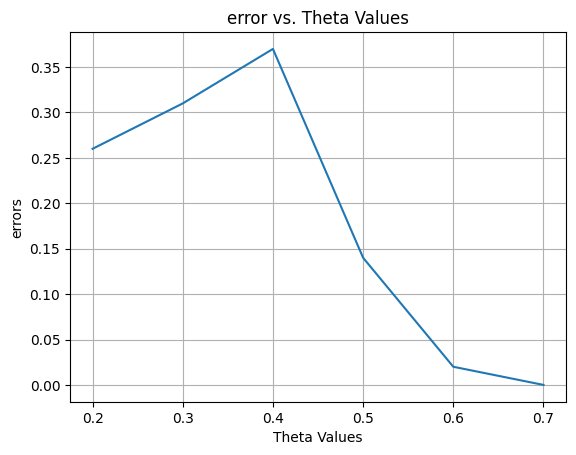

In [ ]:
import matplotlib.pyplot as plt
import math
from scipy.interpolate import CubicSpline

# Define the range of beta values
theta_values = np.arange(0.2, 1, 0.1)  # assuming you want beta from 0 to 1 with a step size of 0.01

# Initialize lists to store probabilities of errors
Pe_1_errors = []
n=200
d=50

# Calculate errors for each beta value
for theta in theta_values:

    P1 = P_e_2(100, n, d, theta)  # converting beta to a float between 0 and 1
    print("error:",P1)
    Pe_1_errors.append(P1)
plt.plot(theta_values, Pe_1_errors)
plt.xlabel('Theta Values')
plt.ylabel('errors')
plt.title('error vs. Theta Values')
plt.grid(True)
plt.show()






In [ ]:
#Average success rate

def average_success_rate(rho,theta,n,d):
  success=[]
  for n_sim in range(50):
    print(n_sim)
    mean = [0, 0]  # Mean vector
    covariance_matrix = [[1, 0.7], [0.7, 1]]  # Covariance matrix
    db1,db2=generate_bivariate_data(d,n,mean,covariance_matrix)
    beta=0.8
        # Compute significant pairs and phi value
    _, _,cleaned_pairs = threshold_and_clean(db1, db2, theta,beta)
    if cleaned_pairs!=None:
      L= len(cleaned_pairs)
    else:
      L=0
    success.append(L)
  total=sum(success)
  Success_rate=total/50
  return Success_rate



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
0
1
2
3
4
5
6
7
8
9


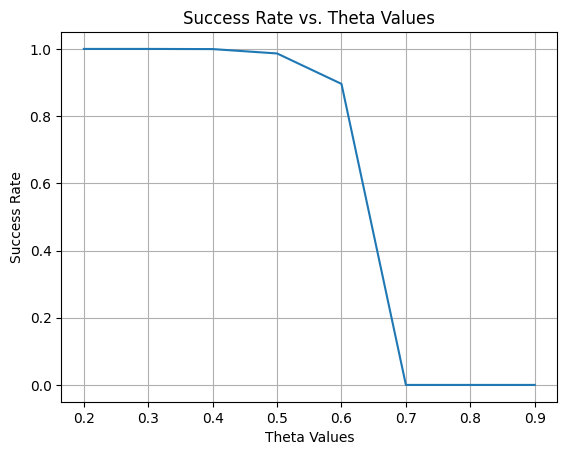

In [ ]:
import matplotlib.pyplot as plt
import math
import numpy as np

theta_values = np.arange(0.2,1,0.1)  # assuming you want beta from 0 to 1 with a step size of 0.01

# Initialize lists to store probabilities of errors
Success_Rate = []
n=200
d=50
rho=0.7
beta=0.4

# Calculate errors for each beta value
for theta in theta_values:

    SR=average_success_rate(rho,theta,n,d)
    SR=SR/n
    Success_Rate.append(SR)
plt.plot(theta_values, Success_Rate)
plt.xlabel('Theta Values')
plt.ylabel('Success Rate')
plt.title('Success Rate vs. Theta Values')
plt.grid(True)
plt.show()

